# Mount Google Drive in Google Colab:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install matplotlib
!pip install seaborn

In [3]:
!pip install umap
!pip install umap-learn[plot]

  Preparing metadata (setup.py) ... done
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3543 sha256=5a24eee83c6e416e40aec3f815a2a6b8e15cc4d92b62936e2244f225f1097047
  Stored in directory: /root/.cache/pip/wheels/15/f1/28/53dcf7a309118ed35d810a5f9cb995217800f3f269ab5771cb
Successfully built umap
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 49.4 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=f1ac21fbeccdfe78092a0b43304ce537a275ed2c73772400c9e7bfebe423b331
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [23]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import umap
import umap.plot
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pd.plotting.register_matplotlib_converters()
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

# **Loading the Dataset**

In [7]:
import pandas as pd

# Update the path below to the path of your CSV file in Google Drive
file_path = '/content/drive/My Drive/CMPE255/fictional_cafe_customer_data.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())


   Customer_ID  Age  Gender           Visit_Date Time_of_Visit Order_Type  \
0         1001   62  Female  2023-08-29 03:16:11          9:17   Takeaway   
1         1002   65  Female  2023-11-01 02:29:15          8:35    Dine-in   
2         1003   18  Female  2023-06-27 09:01:45         16:27    Dine-in   
3         1004   21    Male  2023-03-10 17:00:54         16:52    Dine-in   
4         1005   21  Female  2023-08-22 15:05:57         12:48    Dine-in   

   Total_Spend  Payment_Method  Satisfaction_Rating  Frequency_of_Visits  \
0        26.13  Digital Wallet                    1                    3   
1        44.72     Credit Card                    3                    7   
2        26.98            Cash                    4                    0   
3        23.66     Credit Card                    4                    5   
4        12.84  Digital Wallet                    4                    4   

  Favorite_Item  
0         Latte  
1         Latte  
2        Muffin  
3       

# **Normalizing Dataset**

In [8]:
df_normalized = (df - df.mean()) / df.std()

<ipython-input-8-daee474eff9b>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_normalized = (df - df.mean()) / df.std()
<ipython-input-8-daee474eff9b>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_normalized = (df - df.mean()) / df.std()


# **Handling Missing Values**

In [9]:
df_normalized.fillna(df_normalized.mean(), inplace=True)

# **Exploratory Data Analysis (EDA)**

## 1. Preliminary Data Examination

In [13]:
# Display the first few rows of the dataset
print(df.head())

# Get a concise summary of the DataFrame
print(df.info())

# Statistical summary of numerical features
print(df.describe())

# Checking for missing values
print(df.isnull().sum())

   Customer_ID  Age  Gender           Visit_Date Time_of_Visit Order_Type  \
0         1001   62  Female  2023-08-29 03:16:11          9:17   Takeaway   
1         1002   65  Female  2023-11-01 02:29:15          8:35    Dine-in   
2         1003   18  Female  2023-06-27 09:01:45         16:27    Dine-in   
3         1004   21    Male  2023-03-10 17:00:54         16:52    Dine-in   
4         1005   21  Female  2023-08-22 15:05:57         12:48    Dine-in   

   Total_Spend  Payment_Method  Satisfaction_Rating  Frequency_of_Visits  \
0        26.13  Digital Wallet                    1                    3   
1        44.72     Credit Card                    3                    7   
2        26.98            Cash                    4                    0   
3        23.66     Credit Card                    4                    5   
4        12.84  Digital Wallet                    4                    4   

  Favorite_Item  
0         Latte  
1         Latte  
2        Muffin  
3       

## 2. Univariate Analysis

### 2.1 Numerical Features

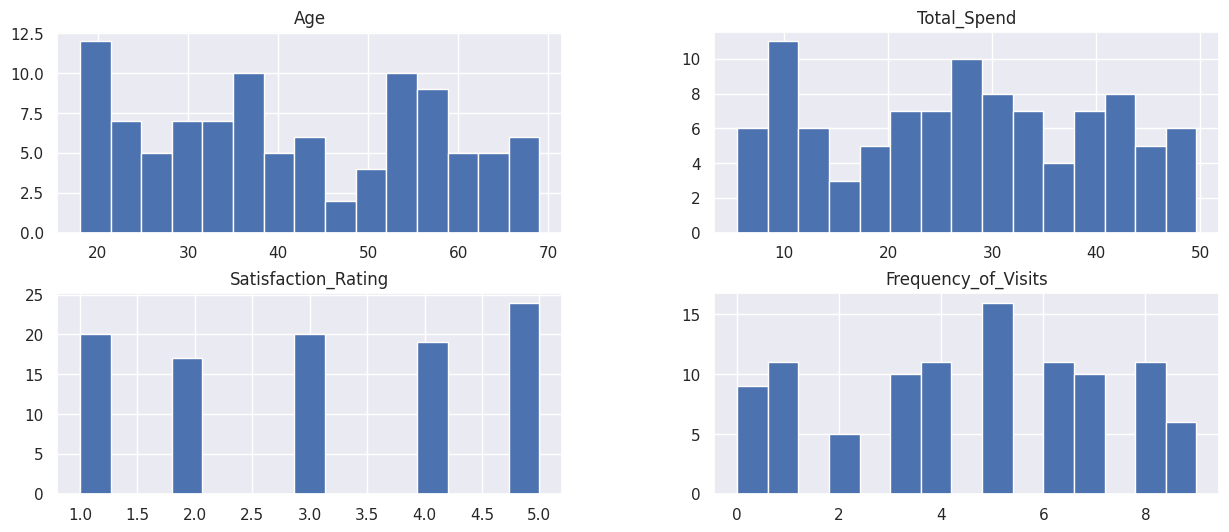

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set()

# Histograms or boxplots
df[['Age', 'Total_Spend', 'Satisfaction_Rating', 'Frequency_of_Visits']].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.show()

### 2.2 Categorical Features

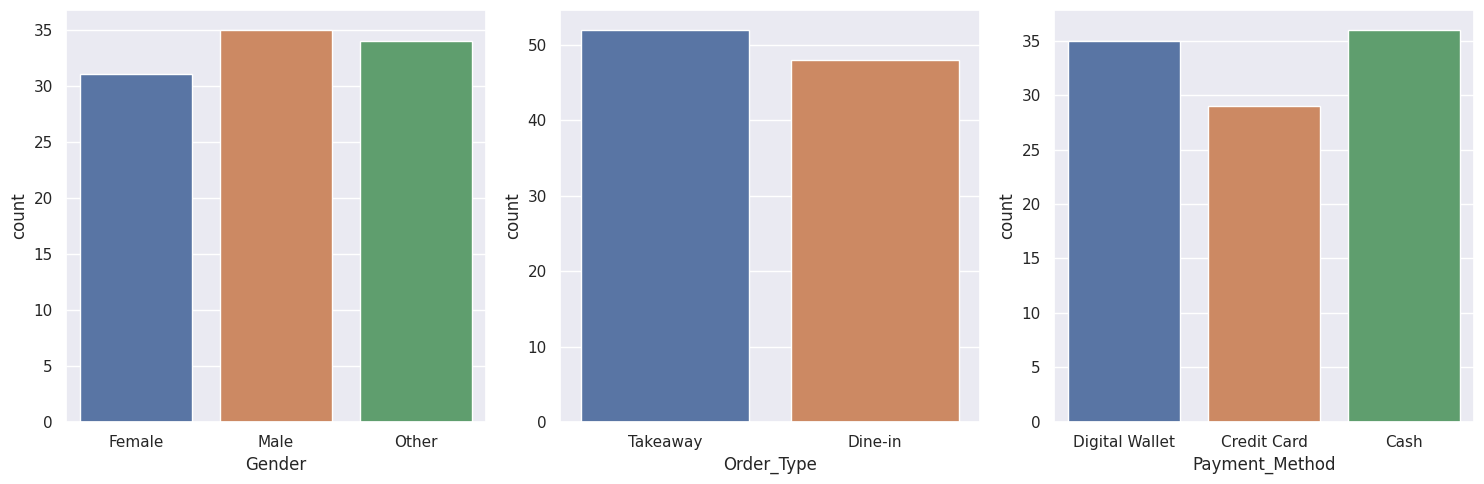

In [15]:
# Count plots for categorical data
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.countplot(x='Gender', data=df, ax=ax[0])
sns.countplot(x='Order_Type', data=df, ax=ax[1])
sns.countplot(x='Payment_Method', data=df, ax=ax[2])
plt.tight_layout()
plt.show()


## 3. Bivariate Analysis

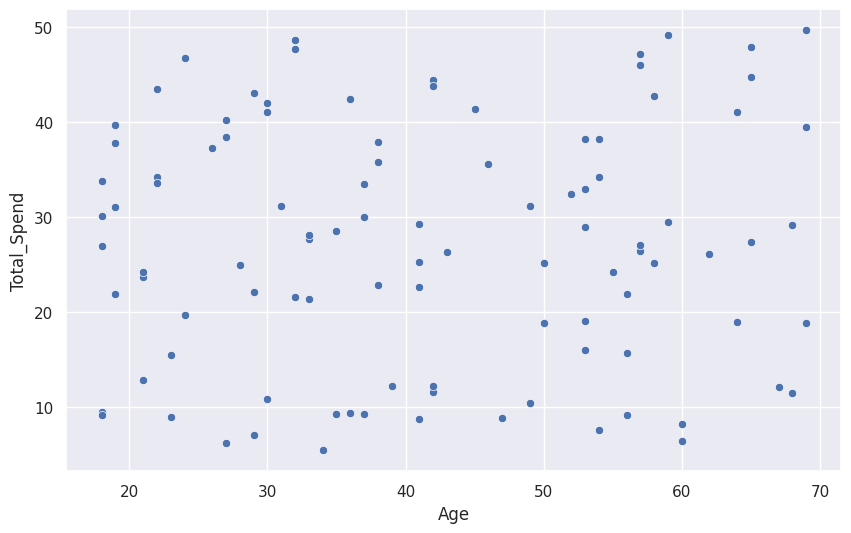

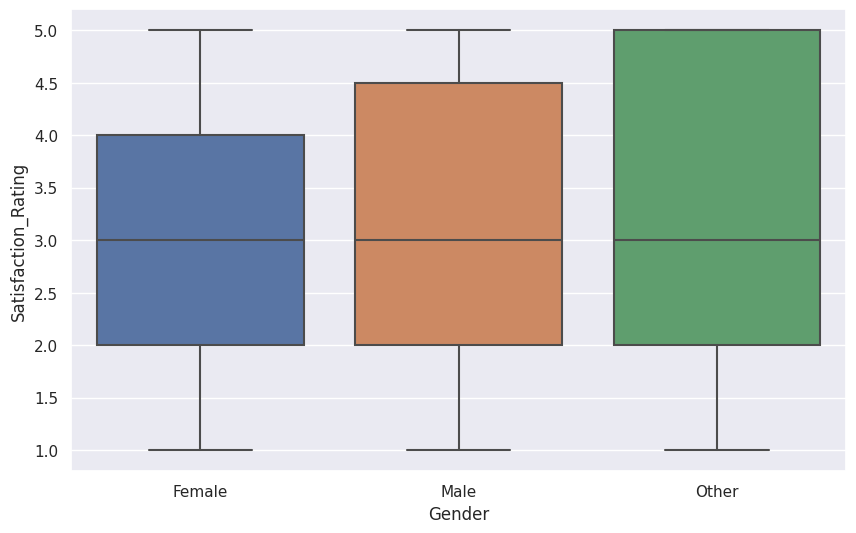

In [16]:
# Scatter plot for Age vs Total Spend
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Total_Spend', data=df)
plt.show()

# Boxplot for Satisfaction Rating across different Genders
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Satisfaction_Rating', data=df)
plt.show()


## 4. Correlation Analysis

<ipython-input-17-12bf2ddacf8e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


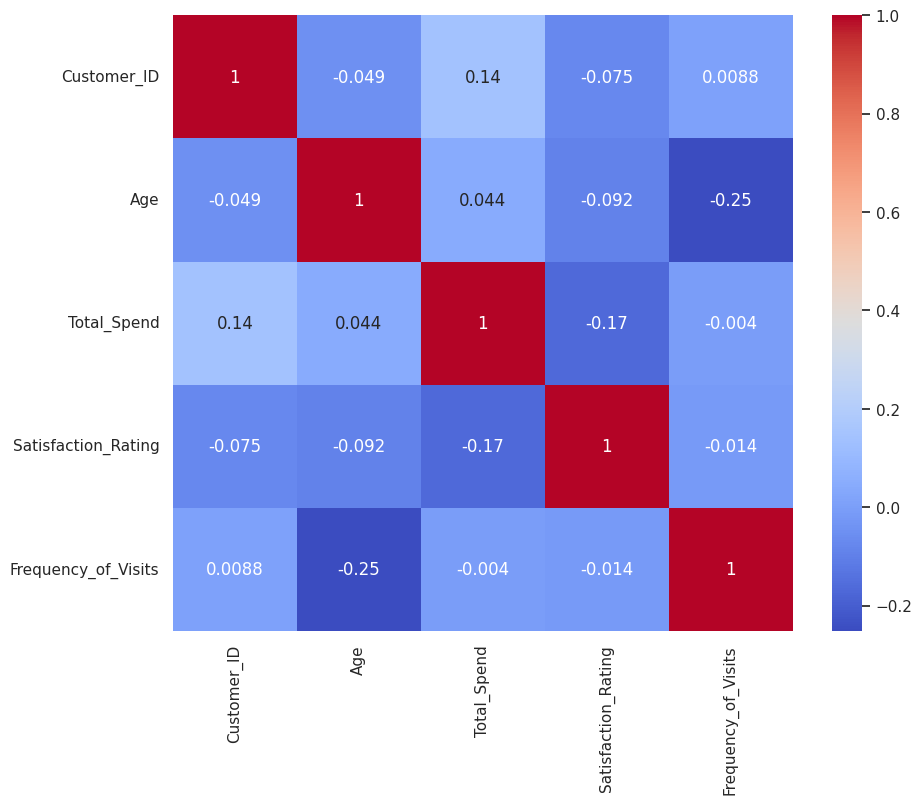

In [17]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


# **Dimensionality Reduction**

### Data Preprocessing

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Example: Encoding categorical variables
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Order_Type'] = le.fit_transform(df['Order_Type'])
df['Payment_Method'] = le.fit_transform(df['Payment_Method'])

# Scaling the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=[np.number]))

### Applying PCA

In [19]:
from sklearn.decomposition import PCA

# Initialize PCA, here we are reducing the data to 2 dimensions
pca = PCA(n_components=2)

# Fit and transform the scaled data
pca_result = pca.fit_transform(scaled_data)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])


### Visualizing the Results

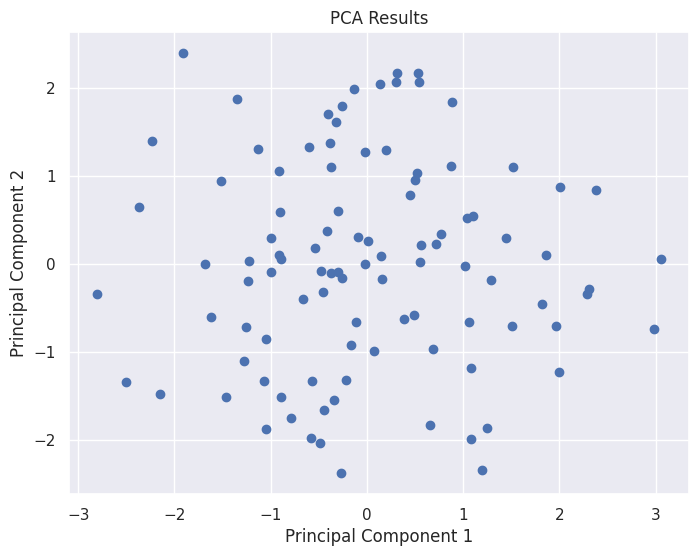

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()

### Implementing t-SNE in Databricks:

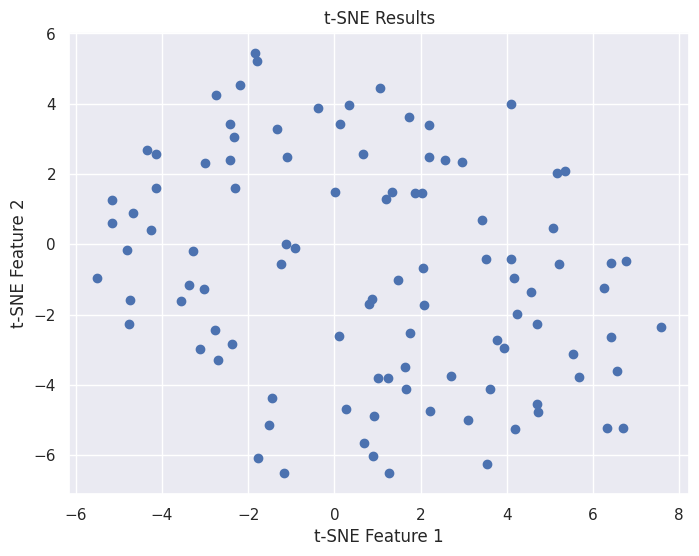

In [21]:
from sklearn.manifold import TSNE

# t-SNE model
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)

# Apply t-SNE to the scaled data
tsne_results = tsne.fit_transform(scaled_data)

# Creating a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2'])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'])
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE Results')
plt.show()

### UMAP (Uniform Manifold Approximation and Projection)

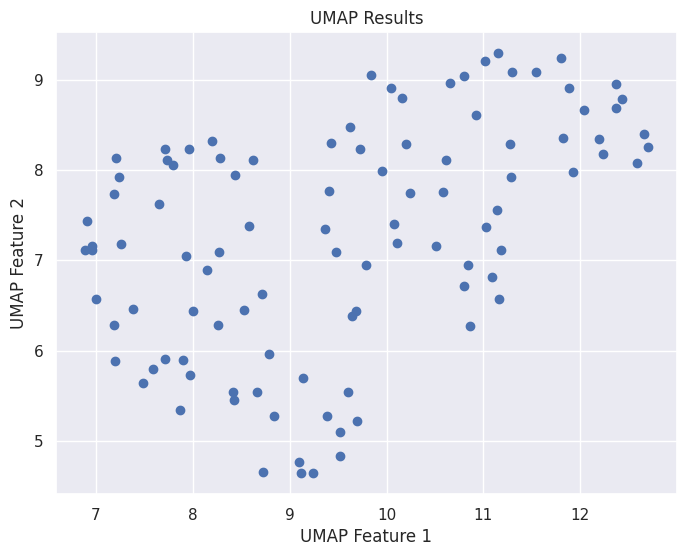

In [22]:
import umap

# UMAP model
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)

# Apply UMAP to the scaled data
umap_results = umap_model.fit_transform(scaled_data)

# Creating a DataFrame for the UMAP results
umap_df = pd.DataFrame(data=umap_results, columns=['UMAP1', 'UMAP2'])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(umap_df['UMAP1'], umap_df['UMAP2'])
plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.title('UMAP Results')
plt.show()